PROBLEM STATEMENT:RESTAURANT REVIEW ANALYSIS USING NATURAL LANGUAGE PROECESSING(NLP)

The business wants to leverage NLP to analyze customer sentiments expressed in
Restaurant reviews. The goal is to gain insights that can be used to improve
customer satisfaction, Product Quality and marketing strategies.

STEP 1:IMPORTING REQUIRED LIBRARIES

In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go

In [20]:
#LOAD THE DATASET
df = pd.read_csv('Restaurant_Reviews.csv', encoding='latin-1')
df.head()

,Review,Liked
0,Wow Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [21]:
df.shape #NO OF ROWS AND COLUMNS

(1000, 2)

In [22]:
df['Liked'].value_counts() #COUNT OF LIKED AND DISLIKED


Liked
1    500
0    500
Name: count, dtype: int64

EXPORATORY DATA ANALYSIS

In [23]:
Labels = pd.DataFrame(df['Liked'].value_counts()).reset_index() 

In [24]:
Labels.columns = ['Liked','Count']

In [25]:
Labels['Liked'] = Labels['Liked'].map({0: 'Negative',1: 'Positive'})


In [26]:
fig = px.pie(Labels, values = 'Count', names = 'Liked', title='Percentage of reviews', hole=.4, color = 'Liked',
             width=800, height=400)
fig.show()

<Axes: xlabel='Liked'>

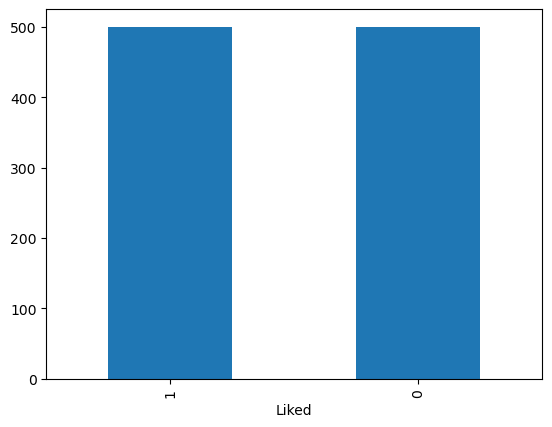

In [27]:
df["Liked"].value_counts().plot(kind="bar")

In [28]:
positive_reviews = df[df["Liked"] == 1]
positive_reviews

,Review,Liked
0,Wow Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1
...,...,...
899,"Overall, a great experience.",1
901,Their regular toasted bread was equally satisf...,1
907,The chips and sals a here is amazing!!!!!!!!!!...,1
909,This is my new fav Vegas buffet spot.,1


In [29]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 


MOST USED WORDS IN POSITIVE REVIEW

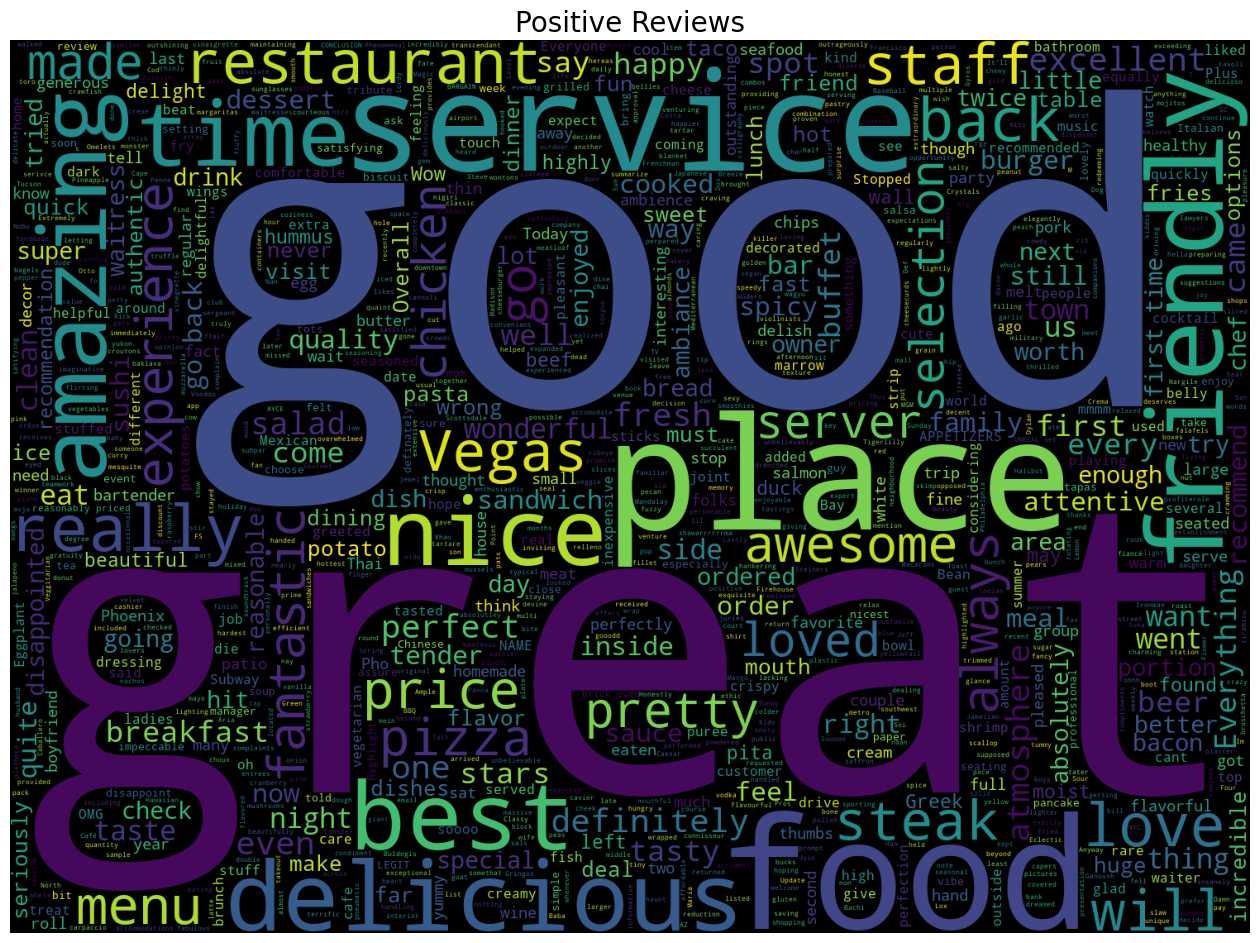

In [30]:
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                          background_color='black',max_words = 10000,
                          width=1500, stopwords=STOPWORDS,
                          height=1080
                         ).generate(" ".join(positive_reviews.Review))
plt.title("Positive Reviews", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

MOST USED WORDS IN NEGATIVE REVIEWS

In [31]:
negative_reviews = df[df["Liked"] == 0]

DATA PREPROCESSING

In [32]:
# Here we get the length of each review
df['Length']= df['Review'].apply(len) 
df.head()

,Review,Liked,Length
0,Wow Loved this place.,1,21
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


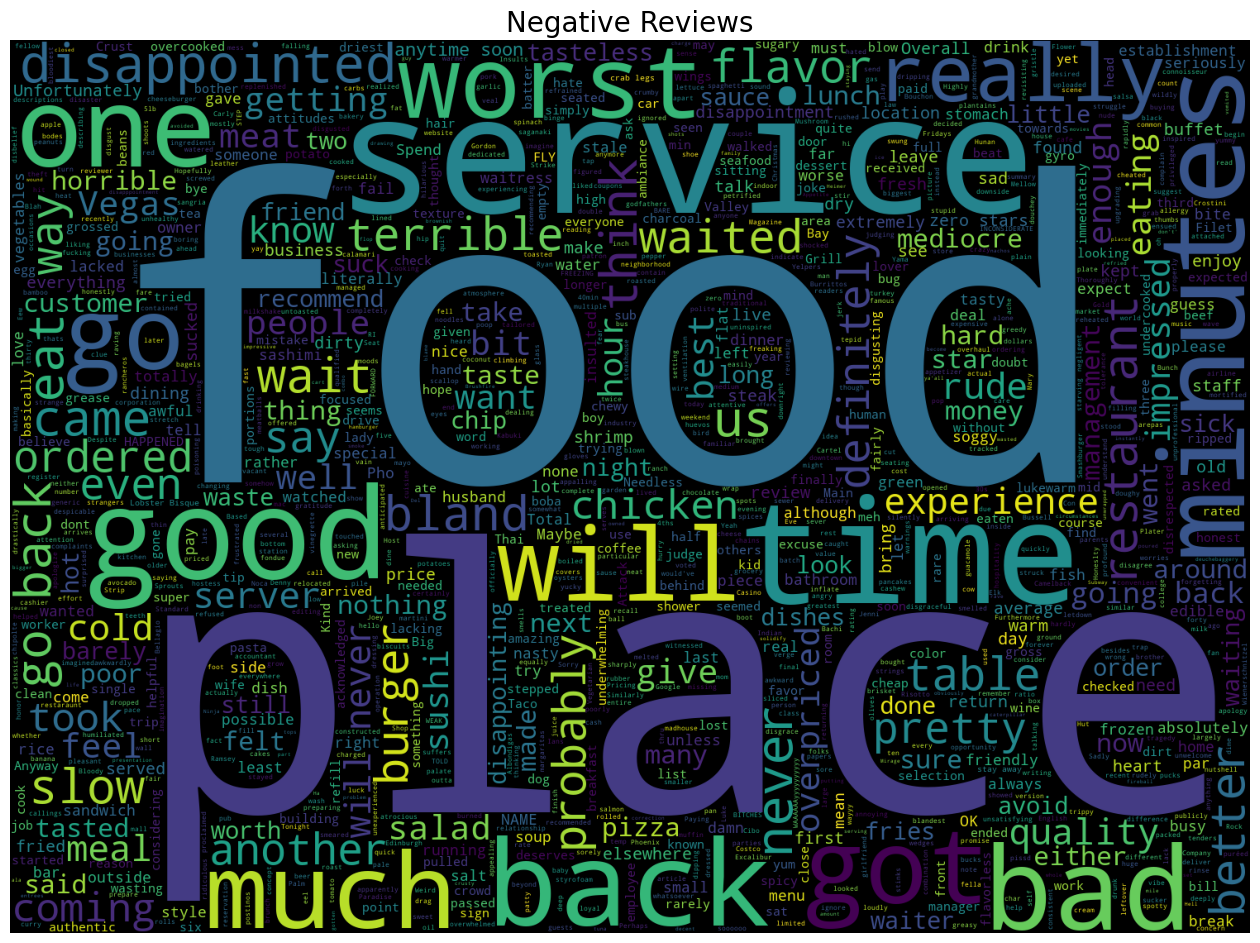

In [33]:
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                          background_color='black',max_words = 10000,
                          width=1500, stopwords=STOPWORDS,
                          height=1080
                         ).generate(" ".join(negative_reviews.Review))
plt.title("Negative Reviews", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()


In [34]:
# Cleaning the reviews
corpus = []
for i in range(0,len(df)):
    

    # Cleaning special character from the reviews
    review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i])

    # Converting the entire review into lower case
    review = review.lower()

    # Tokenizing the review by words
    review_words = review.split()

    # Removing the stop words
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

    # Stemming the words
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]
     # Joining the stemmed words
    review = ' '.join(review)

    # Creating a corpus
    corpus.append(review)

In [35]:
# lets check the corpus
corpus[0:5]


['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

CONVERTING THE TEXT DATA INTO VECTOR FORM USING COUNTVECTORIZER

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
# Creating the Bag of Words model
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.loc[:, 'Liked'].values

SPLITING THE DATA  INTO TRAINING AND TESTING

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

import warnings 
warnings.filterwarnings('ignore')

MODEL DEVELOPMENT

In [41]:
# Model building function
def Model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return model,accuracy

In [42]:
logreg_model=LogisticRegression(solver='liblinear')
logreg_model.fit(X_train, y_train)
train_preds=logreg_model.predict(X_test)
accuracy_log_reg= accuracy_score(y_test, train_preds)

<Axes: >

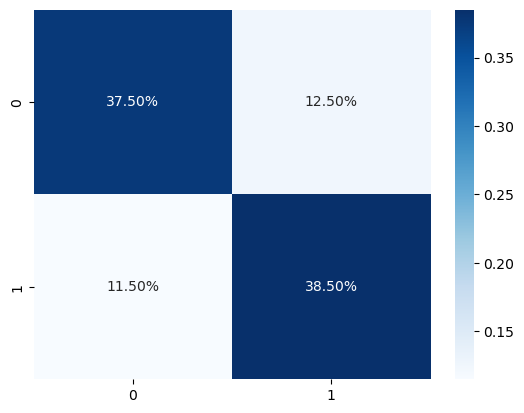

In [43]:
cm1 = confusion_matrix(y_test, train_preds)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='.2%', cmap='Blues')

In [44]:
from sklearn.svm import SVC
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

# Create a GridSearchCV object and fit it to the training data
grid = GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [45]:
# Find the optimal parameters
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


CUSTOM PREDICTION

In [46]:
# Helper Function for prediction
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    temp = cv.transform([final_review]).toarray()
    return grid.predict(temp)

In [47]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [48]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [49]:
# Predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!')

This is a POSITIVE review.


CONCLUSION

 1.Positive Sentiments:
The majority of reviews express positive sentiments, indicating overall satisfaction among customers.
Common positive sentiments include compliments on food quality, service, ambiance, and overall dining experience.

 2.Negative Sentiments:
While positive sentiments dominate, negative sentiments do exist and often revolve around specific issues.
Common complaints include issues with service, long waiting times, pricing concerns, and occasional inconsistencies in food quality.
 
 3.Impact of Online Presence:
Restaurants with a strong online presence, including active engagement on review platforms and social media, tend to have more positive reviews.

In conclusion, sentiment analysis using NLP on restaurant reviews proves to be a valuable tool for understanding customer opinions and making data-driven decisions. By addressing specific issues highlighted in negative sentiments and leveraging positive feedback, restaurants can enhance their overall customer experience and reputation. Regularly monitoring sentiment trends allows for adaptive strategies, ensuring sustained success in the dynamic restaurant industry.

FUTURE SCOPE AND CHALLENGES FACED

1.Fine-grained Analysis:
Develop more advanced NLP models capable of nuanced sentiment analysis, including identifying subtle emotions and sentiments that go beyond the binary positive/negative classification.

2.Sentiment Analysis for Trend Prediction:
Explore the use of sentiment analysis to predict upcoming food and dining trends. By analyzing reviews and social media sentiments, restaurants can stay ahead of trends, adjust their menus, and offer experiences that align with evolving consumer preferences.

3.Long-term Trend Analysis:
Use sentiment analysis to conduct long-term trend analysis, identifying patterns and shifts in customer sentiments over extended periods. This can aid in strategic planning and adapting to changing consumer preferences.

CHALLENGES FACED:
 1.Natural language is often ambiguous, and the meaning of words can vary based on context. Understanding the 
  context in which certain words or phrases are used can be challenging, leading to potential misinterpretations of sentiment.

 2.Reviewers may express sentiments using sarcasm or irony, making it difficult for traditional sentiment analysis models to      accurately capture the intended meaning. Identifying subtle nuances in language is a persistent challenge.